# 02 - Exploratory Data Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sns.set_context('notebook')
sns.set_palette('deep')
sns.set_style('whitegrid')
import warnings
warnings.filterwarnings('ignore')

### Aux. Functions

In [3]:
def subset_flights2(df, flyFrom='all', flyTo='all', dDate='all', dTime='all', flight_no='all'):
    params = locals()
    del params['df']
    for arg, value in params.items():
        if value != 'all':
            df = df[df[arg] == value]
    return df

In [4]:
def subset_flights(df, orig='all', dest='all', dDate='all', dTime='all', flight_no='all'):
    if orig != 'all':
        df = df[df['flyFrom'] == orig]
    if dest != 'all':
        df = df[df['flyTo'] == dest]
    if dDate != 'all':
        df = df[df['dDate'] == dDate]
    if dTime != 'all':
        df = df[df['dTime'] == dTime]
    if flight_no != 'all':
        df = df[df['flight_no'] == flight_no]
        
    return df

In [5]:
def subset_by_route(df, route):
    if type(route) is str:
        orig = route.split('-')[0]
        dest = route.split('-')[1]
    else:
        orig = route[0]
        dest = route[1]
    df = df[(df['flyFrom'] == orig) & (df['flyTo'] == dest)]
    return df

In [6]:
def plot_hist_price_by_route(df, log=True):
    df = df.copy()
    routes = df['flyFrom'] +'-'+ df['flyTo']
    routes = routes.unique()
    if log:
        df['price'] = np.log(df['price'])
    f, axes = plt.subplots(2, 5, figsize=(15,9));
    axes = axes.ravel();
    for idx, route in enumerate(routes):
        df_route = subset_by_route(df,route)
        sns.histplot(df_route['price'], kde=False, ax=axes[idx]);
        axes[idx].set_title(route)
    plt.tight_layout()
        

### Load data

In [7]:
flights = pd.read_csv('../data/interim/flights_interim.csv')

In [8]:
flights.head()

,collectionDate,dDate,dTime,aDate,aTime,dTimeUTC,aTimeUTC,flyFrom,flyTo,airlines,...,distance,route,price,seats,cityFrom,cityCodeFrom,cityTo,cityCodeTo,countryFrom,countryTo
0,2021-01-31,2021-02-01,15:00,2021-02-01,16:25,2021-02-01 14:00:00,2021-02-01 15:25:00,MAD,BCN,UX,...,483.25,MAD -> BCN,78,NaN,Madrid,MAD,Barcelona,BCN,Spain,Spain
1,2021-01-31,2021-02-01,09:35,2021-02-01,10:50,2021-02-01 08:35:00,2021-02-01 09:50:00,MAD,BCN,VY,...,483.25,MAD -> BCN,91,NaN,Madrid,MAD,Barcelona,BCN,Spain,Spain
2,2021-01-31,2021-02-01,19:45,2021-02-01,21:05,2021-02-01 18:45:00,2021-02-01 20:05:00,MAD,BCN,IB,...,483.25,MAD -> BCN,91,5.0,Madrid,MAD,Barcelona,BCN,Spain,Spain
3,2021-01-31,2021-02-01,19:15,2021-02-02,08:50,2021-02-01 18:15:00,2021-02-02 07:50:00,MAD,BCN,UX,...,483.25,MAD -> BCN,108,3.0,Madrid,MAD,Barcelona,BCN,Spain,Spain
4,2021-01-31,2021-02-01,14:50,2021-02-02,08:50,2021-02-01 13:50:00,2021-02-02 07:50:00,MAD,BCN,UX,...,483.25,MAD -> BCN,112,3.0,Madrid,MAD,Barcelona,BCN,Spain,Spain


In [9]:
flights.drop_duplicates(inplace=True)
# Data transformations needed for some visualization:
flights['orig-dest'] = flights['flyFrom'] +'-'+ flights['flyTo']
#flights['airlines_'] = flights['airlines'].apply(lambda x: x.split(',')[0])
flights['flight_no'] = flights['airlines'].apply(lambda x: x.split(',')[0])+''+flights['flight_no'].astype(str)

In [10]:
flights['flight_no'].head()

0    UX7703
1    VY1003
2    IB1946
3    UX6097
4    UX6067
Name: flight_no, dtype: object

### Features Overview

In [11]:
flights.columns

Index(['collectionDate', 'dDate', 'dTime', 'aDate', 'aTime', 'dTimeUTC',
       'aTimeUTC', 'flyFrom', 'flyTo', 'airlines', 'flight_no', 'fly_duration',
       'distance', 'route', 'price', 'seats', 'cityFrom', 'cityCodeFrom',
       'cityTo', 'cityCodeTo', 'countryFrom', 'countryTo', 'orig-dest'],
      dtype='object')

Target:
* price: Ticket price of a flight

Features:
* **collectionDate**: date flight data was taken
* **dDate**: departure day
* **dTime**: departure time
* **aDate**: arrival day
* **aTime**: arrival time
* **dTimeUTC**, **aTimeUTC**: departure and arrival time in UTC timezone
* **flyFrom**: origin airport IATA code
* **flyTo**: destination airport IATA code
* **airlines**: self-explanatory
* **flight_no**: identification plain number
* **fly_duration**, **distance**: self-explanatory
* **route**: airports through flight passes
* **seats**: availability
* **cityFrom**, **cityCodeFrom**, **cityTo**, **cityCodeTo**: different id's for the origin and destination cities
* **countryFrom**, **countryTo**: origin and dest countries

Numerical: distance, fly_duration, seats, price
\
Categorical: flyFrom, flyTo, airlines, route

In [12]:
flights[['distance', 'fly_duration', 'seats','price']].describe()

,distance,fly_duration,seats,price
count,1.266210e+06,1.266210e+06,973929.000000,1.266210e+06
mean,4.035434e+03,2.124810e+01,2.720383,3.278173e+02
std,3.617889e+03,1.248897e+01,2.420424,4.359747e+02
min,2.021800e+02,7.500000e-01,1.000000,2.000000e+01
25%,1.110280e+03,1.266667e+01,1.000000,1.030000e+02
50%,1.774110e+03,2.066667e+01,1.000000,2.420000e+02
75%,9.075770e+03,2.800000e+01,4.000000,3.840000e+02
max,1.009794e+04,6.000000e+01,8.000000,7.543700e+04


In [13]:
# TODO: comment descriptive statitics when I have final dataset

In [14]:
flights.isna().sum()

collectionDate         0
dDate                  0
dTime                  0
aDate                  0
aTime                  0
dTimeUTC               0
aTimeUTC               0
flyFrom                0
flyTo                  0
airlines               0
flight_no              0
fly_duration           0
distance               0
route                  0
price                  0
seats             292281
cityFrom               0
cityCodeFrom           0
cityTo                 0
cityCodeTo             0
countryFrom            0
countryTo              0
orig-dest              0
dtype: int64

## Univariate Analysis

### Price

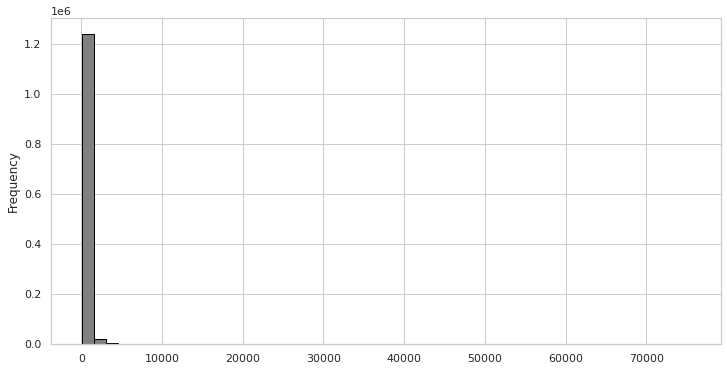

In [15]:
flights['price'].plot(kind='hist', 
                            bins=50, 
                            figsize=(12,6), 
                            facecolor='grey',
                            edgecolor='black');

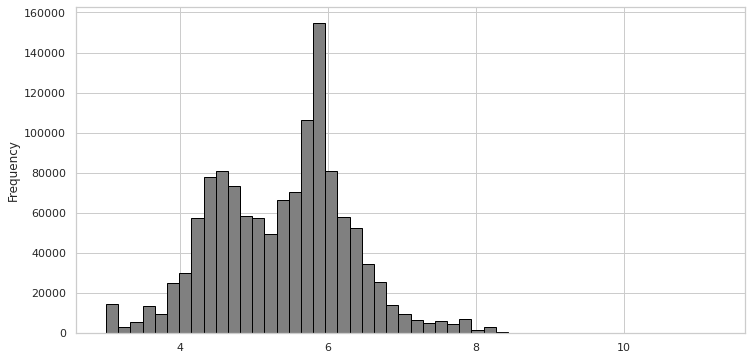

In [16]:
flights['log_price'] = np.log(flights['price'])
flights['log_price'].plot(kind='hist', 
                            bins=50, 
                            figsize=(12,6), 
                            facecolor='grey',
                            edgecolor='black');

#### Log-Price histogram by route

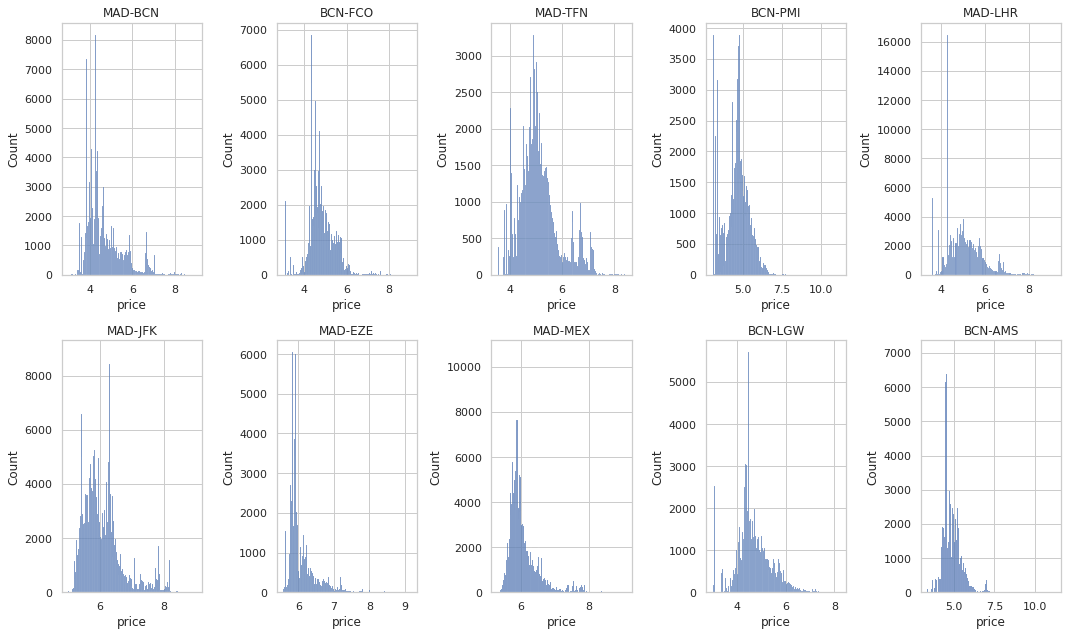

In [17]:
plot_hist_price_by_route(flights, log=True);

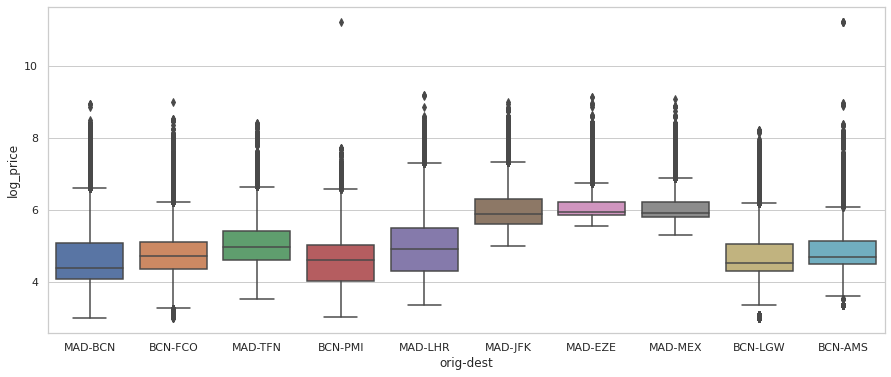

In [18]:
flights['orig-dest'] = flights['flyFrom'] +'-'+ flights['flyTo']
plt.figure(figsize=(15, 6))
sns.boxplot(x='orig-dest', y='log_price', data=flights);

* As expected, longest routes have more expensive fares
* Many outliers

### CollectionDate

In [19]:
flights['collectionDate'].head()

0    2021-01-31
1    2021-01-31
2    2021-01-31
3    2021-01-31
4    2021-01-31
Name: collectionDate, dtype: object

* Day that data was collected. We can use this variable to compute a new 'Days to departure' numerical variable using this column and departure date colunm.

### FlyFrom, FlyTo

We have collected flights of 10 routes:

In [20]:
routes = flights['flyFrom'] +'-'+ flights['flyTo']

In [21]:
routes.unique()

array(['MAD-BCN', 'BCN-FCO', 'MAD-TFN', 'BCN-PMI', 'MAD-LHR', 'MAD-JFK',
       'MAD-EZE', 'MAD-MEX', 'BCN-LGW', 'BCN-AMS'], dtype=object)

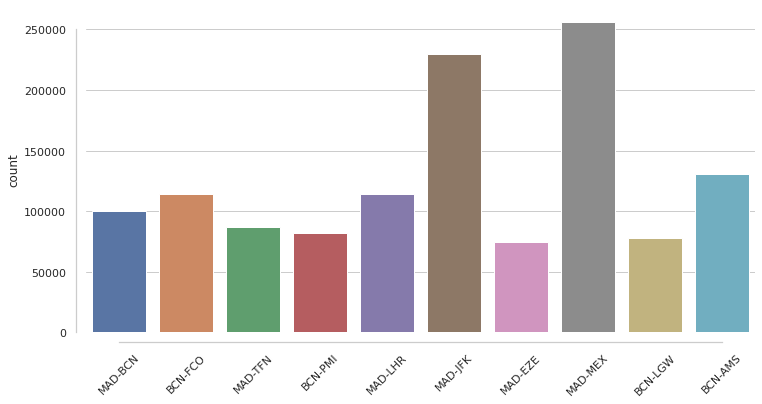

In [22]:
plt.figure(figsize=(12,6))
sns.countplot(routes)
sns.despine(offset=10, trim=True);
plt.xticks(rotation=45);

* MAD-JFK (Madrid-New York) and MAD-MEX (Madrid-Mexico City) are the busiest routes. The rest of them have a similar traffic.
* Maybe we can add a new categorical variable with the route. 

### Airlines

In [23]:
flights[['airlines', 'route']]

,airlines,route
0,UX,MAD -> BCN
1,VY,MAD -> BCN
2,IB,MAD -> BCN
3,UX,MAD -> BCN
4,UX,MAD -> BCN
...,...,...
1312163,TP,BCN->LIS->FCO
1312164,UX,BCN->MAD->FCO
1312165,UX,BCN->MAD->FCO
1312166,TP,BCN->LIS->FCO


* Airlines column show the carrier that manage a given flight. Hopping flights have more than one airline.

In [24]:
airlines = {'UX'}
flights['hopping'] = flights['airlines'].apply(lambda x: 1 if len(x.split(',')) > 1 else 0)

In [25]:
flights['hopping'].value_counts()

1    704706
0    561504
Name: hopping, dtype: int64

In [26]:
direct = flights[flights['hopping'] == 0]

In [27]:
main_airlines = direct['airlines'].unique()

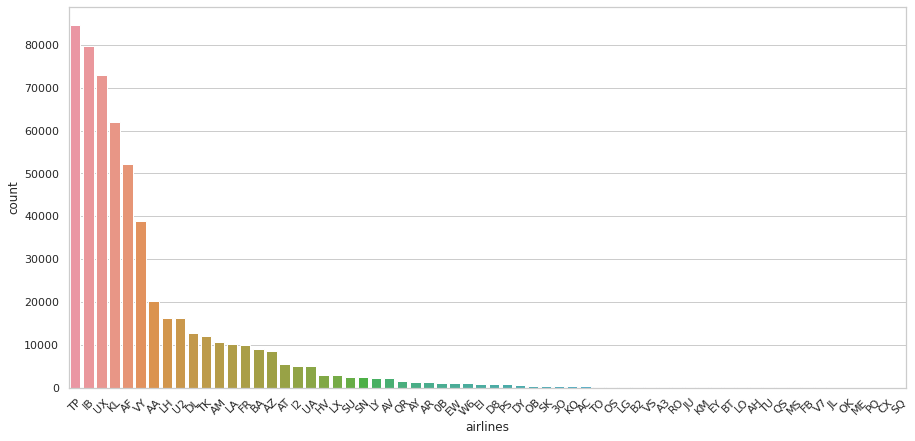

In [28]:
plt.figure(figsize=(15,7))
sns.countplot(direct['airlines'], order = direct['airlines'].value_counts().index)
plt.xticks(rotation=45);

### Flight_no

In [29]:
flights['flight_no'].head()

0    UX7703
1    VY1003
2    IB1946
3    UX6097
4    UX6067
Name: flight_no, dtype: object

* flight_no identifies a unique plain. Using this variable we can show price evolution a concrete flight through days. For example:

In [30]:
plain_id = 'UX7703'

In [31]:
flights_UX7703 = subset_flights(flights, 'MAD', 'BCN', '2021-02-08', '15:00', plain_id)

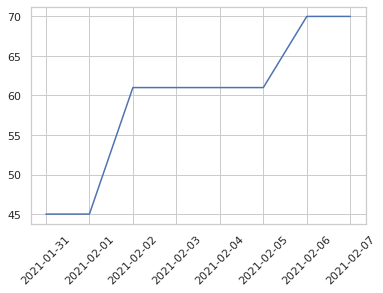

In [32]:
plt.plot(flights_UX7703['collectionDate'], flights_UX7703['price']);
plt.xticks(rotation=45);

### Fly_duration

In [33]:
flights['fly_duration'].head()

0     1.416667
1     1.250000
2     1.333333
3    13.583333
4    18.000000
Name: fly_duration, dtype: float64

In [34]:
flights['fly_duration'].describe()

count    1.266210e+06
mean     2.124810e+01
std      1.248897e+01
min      7.500000e-01
25%      1.266667e+01
50%      2.066667e+01
75%      2.800000e+01
max      6.000000e+01
Name: fly_duration, dtype: float64

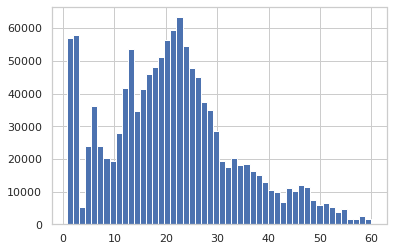

In [35]:
plt.hist(flights['fly_duration'], bins=50);

* It seems that there are some variability in the fly_duration variable even in flights of the same route.

### Distance

* Distance is fixed for each route

### Route

In [36]:
# TODO: route col broken in flights collected before 24 feb. USE airlines length-1 instead

In [37]:
flights['route'].head()

0    MAD -> BCN
1    MAD -> BCN
2    MAD -> BCN
3    MAD -> BCN
4    MAD -> BCN
Name: route, dtype: object

* This variable shows the hops in a flight route between origin and destination
* We can use this to create a new columns that computes the number of hops

In [38]:
flights['hopping'] = flights['airlines'].apply(lambda x: x.split()).apply(len)-1

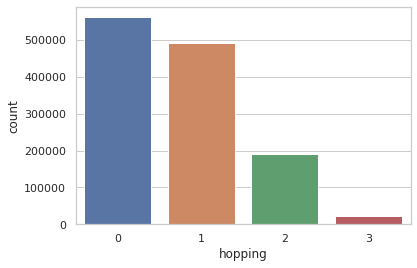

In [39]:
sns.countplot(flights['hopping']);

### Seats

In [40]:
flights['seats'].isna().sum()

292281

In [41]:
flights['seats'].isna().sum() / flights.shape[0]

0.2308313786812614

* This column has many NaN values (21.19%).

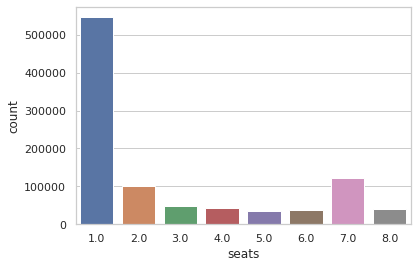

In [42]:
sns.countplot(flights['seats']);

* There are no 0's so maybe NaN values represent a 0?

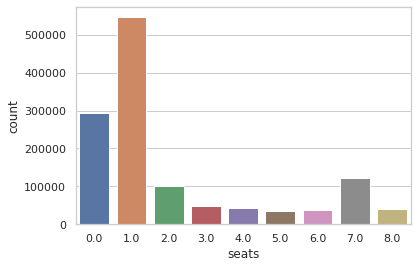

In [43]:
sns.countplot(flights['seats'].fillna(0));

## collectionDate and daysToDep

We can use 'collectionDate' column to compute days until the flight departure. This would be a new numerical variable.

In [44]:
collected = pd.to_datetime(flights['collectionDate'])
departure =  pd.to_datetime(flights['dDate'])

daysToDep = departure - collected
daysToDep = daysToDep.apply(lambda x: str(x).split()[0])

In [45]:
flights['daysToDep'] = daysToDep.astype(int)

## Multivariate Analysis

In [46]:
corr_mat = flights.corr()
corr_mat['price'].sort_values(ascending=False)

price           1.000000
log_price       0.711591
distance        0.363309
fly_duration    0.195374
hopping         0.185394
daysToDep      -0.028653
seats          -0.052996
Name: price, dtype: float64

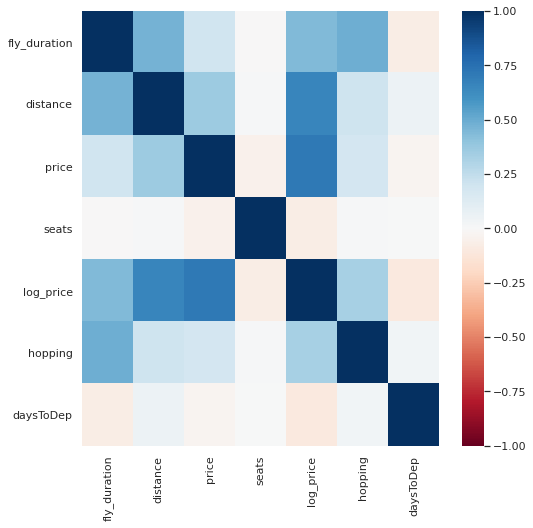

In [47]:
plt.figure(figsize=(8,8))
sns.heatmap(corr_mat, vmin=-1, vmax=1, cmap='RdBu', annot=False);

### Price-CollectionDate

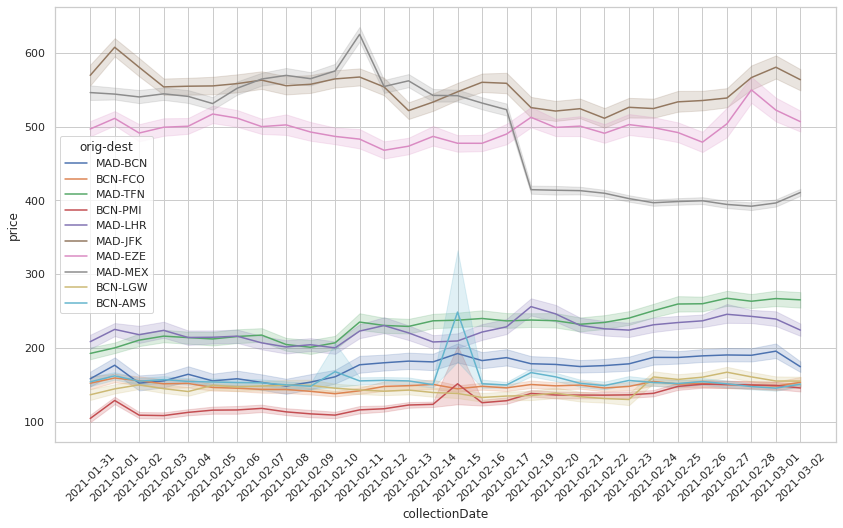

In [48]:
plt.subplots(figsize=(14,8))
sns.lineplot(x='collectionDate', y='price', data=flights, hue='orig-dest');
plt.xticks(rotation=45);

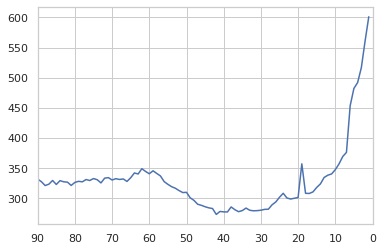

In [77]:
# mean price by remaining days to departure
grouped= flights.groupby('daysToDep')['price'].mean()
plt.plot(grouped);
plt.xlim(grouped.index.max(), 0);

* The mean price start to decrease around two month before flight departure, reach its minimum at one month, and start increasing two/three weeks before departure.

In [116]:
flights['flight_no'].head()

0    UX7703
1    VY1003
2    IB1946
3    UX6097
4    UX6067
Name: flight_no, dtype: object

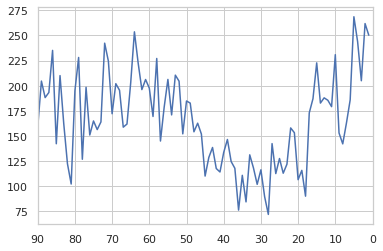

In [120]:
flights_sample = subset_flights(flights, flight_no='UX7703')
grouped= flights_sample.groupby('daysToDep')['price'].mean()
plt.plot(grouped);
plt.xlim(grouped.index.max(), 0);

## Price-Distance

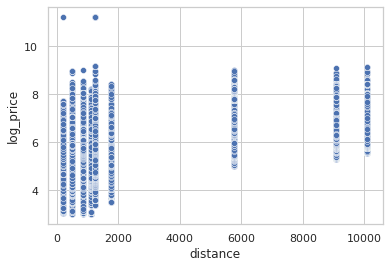

In [80]:
sns.scatterplot(x='distance', y='log_price', data=flights);

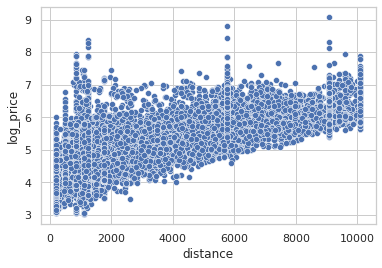

In [95]:
grouped = flights.groupby(['dDate', 'dTime'])[['distance','log_price']].mean()
sns.scatterplot(x='distance', y='log_price', data=grouped);

* Here we can see how price increases by distance.

## Price-Airlines